## US Consumer Credit Analytics

### [1] Sumary and introduction of the study  

<< Consumer credit summary>>

_What does this data represent?_<br>
The following data is time series consumer credit card data collected by the Federal Reserve Bank on a month to month basis. This data amongst other data is used to analyse the credit health of the American consumers. the time period under interest is for he past decade, 2013 to 2023.

_Purpose of analysis?_<br>
The purpose of this study is to create models that can be used to predict trends in the consumer credit. Another purpose of this study is to find out which other economic data are relevant in prediciting trends in consumer credit and by correlation.

Data of interest in this analysis:
1. Federal Reserve Prime Monthly Interest Rates
2. Federal Reserve ....

_Study Question:_
1. How does consumer credit change over time in relation to the FED interest rate? 

_Data source(s):_<br>
1. Consumer credit data: https://www.federalreserve.gov/releases/g19/current/default.htm
2. Intrest Rate data: https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H15


### [2] Data study and general imports

In [1]:
# app to capture the desired date range for retriveing the data

In [2]:
# import 
import Analysis_repo
from Analysis_repo import sourceCode
from Analysis_repo import notebook_import_library as importLibrary


# Get the data form the Source code file
try:
    consumer_credit_data = sourceCode.sendConsumerCreditData() # get consumer credit data
    interest_rate_data = sourceCode.sendInterestRateData()[5:] # get interest rate data
    #print(consumer_credit_data) # print out the columns
except Exception as e:
    print("An exception occurred:", e)
    
# actual for analysis
credit_data_analysis = consumer_credit_data[5:]

interest_rate_data
    

,Series Description,Federal funds effective rate,30-Day AA Nonfinancial Commercial Paper Interest Rate,60-Day AA Nonfinancial Commercial Paper Interest Rate,90-Day AA Nonfinancial Commercial Paper Interest Rate,30-Day AA Financial Commercial Paper Interest Rate,60-Day AA Financial Commercial Paper Interest Rate,90-Day AA Financial Commercial Paper Interest Rate,"Average majority prime rate charged by banks on short-term loans to business, quoted on an investment basis",The rate charged for primary credit under amendment to the Board's Regulation A,...,"Market yield on U.S. Treasury securities at 7-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 20-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 30-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 5-year constant maturity, quoted on investment basis, inflation-indexed","Market yield on U.S. Treasury securities at 7-year constant maturity, quoted on investment basis, inflation-indexed","Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on investment basis, inflation-indexed","Market yield on U.S. Treasury securities at 20-year constant maturity, quoted on investment basis, inflation-indexed","Market yield on U.S. Treasury securities at 30-year^ constant maturity, quoted on investment basis,^ inflation-indexed",Treasury long-term average (over 10 years)
5,2013-01,0.14,0.12,0.13,0.16,0.11,0.15,0.19,3.25,0.75,...,1.30,1.91,2.68,3.08,-1.39,-1.04,-0.61,0.20,0.48,0.03
6,2013-02,0.15,0.12,0.14,0.17,0.11,0.12,0.16,3.25,0.75,...,1.35,1.98,2.78,3.17,-1.39,-0.94,-0.57,0.19,0.57,0.10
7,2013-03,0.14,0.10,0.13,0.15,0.11,0.13,0.15,3.25,0.75,...,1.32,1.96,2.78,3.16,-1.43,-0.97,-0.59,0.19,0.62,0.13
8,2013-04,0.15,0.08,0.10,0.12,0.10,0.13,0.16,3.25,0.75,...,1.15,1.76,2.55,2.93,-1.38,-0.97,-0.65,0.07,0.48,-0.01
9,2013-05,0.11,0.07,0.08,0.10,0.09,0.11,0.14,3.25,0.75,...,1.31,1.93,2.73,3.11,-1.14,-0.69,-0.36,0.35,0.72,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2023-08,5.33,5.30,5.33,5.34,5.37,5.43,5.44,8.50,5.50,...,4.26,4.17,4.46,4.28,2.07,1.93,1.83,1.88,1.97,2.02
133,2023-09,5.33,5.31,5.33,5.34,5.38,5.48,5.49,8.50,5.50,...,4.46,4.38,4.65,4.47,2.23,2.12,2.04,2.07,2.13,2.18
134,2023-10,5.33,5.33,5.35,5.38,5.38,5.43,5.46,8.50,5.50,...,4.82,4.80,5.13,4.95,2.46,2.43,2.41,2.45,2.48,2.55
135,2023-11,5.33,5.33,5.35,5.38,5.37,5.43,5.41,8.50,5.50,...,4.53,4.50,4.84,4.66,2.24,2.22,2.20,2.23,2.26,2.33


In [3]:
# 1. Dimensions of the datatset
print("Rows:", credit_data_analysis.shape[0] , "Cols:", credit_data_analysis.shape[1])

# 2. Data types in the dataset
#print("Data types:", credit_data_analysis.info())

# 3. Checking for missing values in dataset
#count_of_missing = credit_data_analysis.isna().sum()
#print("Missing values:", count_of_missing)
dropped = consumer_credit_data.drop(['Revolving consumer credit owned by commercial banks, not seasonally adjusted flow, monthly rate (discontinued after February 2011)'], axis=1)
# dropped.columns


# >>>>> handling missing values

Rows: 130 Cols: 52


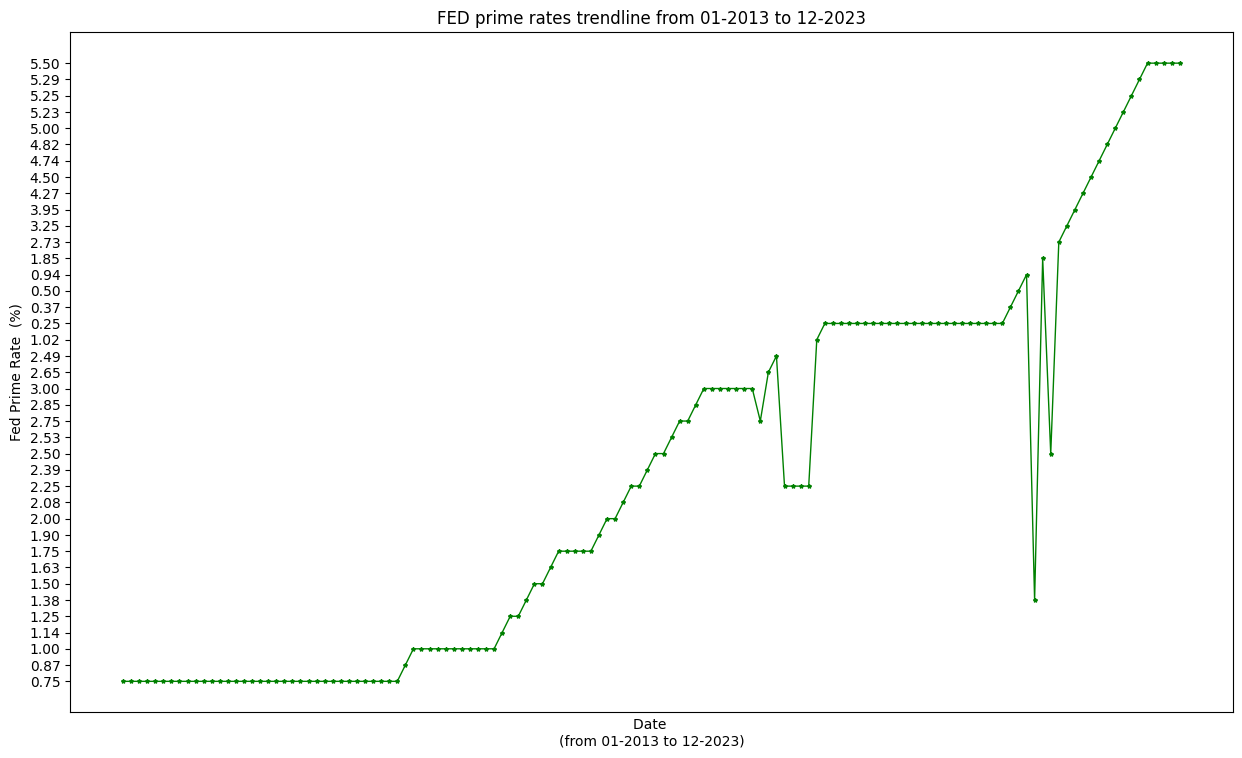

In [4]:
# change in data PLots

# Get the fed prime rate and date data
fed_prime_rate = interest_rate_data["The rate charged for primary credit under   amendment to the Board's Regulation A"]
prime_rate_date = interest_rate_data["Series Description"]

importLibrary.plt.figure(figsize=(15, 10)) # setting plot szie

# Create a scatter plot
importLibrary.plt.plot(prime_rate_date, fed_prime_rate, color='green', marker='*', linestyle='-', linewidth=1, markersize=3, label='Monthly Prime Rate %')

# Add labels and title
importLibrary.plt.xlabel('Date \n(from 01-2013 to 12-2023)')
importLibrary.plt.xticks([]) # hide the date tick labels
importLibrary.plt.subplots_adjust(bottom=0.2) 
importLibrary.plt.ylabel('Fed Prime Rate  (%)')
importLibrary.plt.title('FED prime rates trendline from 01-2013 to 12-2023')

# Show the plot
importLibrary.plt.show() #show plot


# Insighs on Plot


# improvement ideas
# 1. Group rates by Q
# 2. Color code rate dot by previous price movement
# 3. 

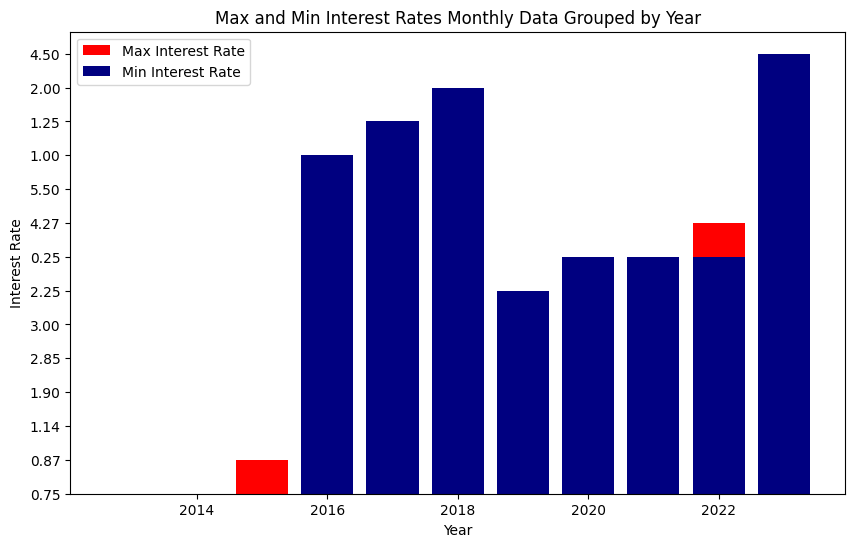

In [70]:
# year range of prime range
FED_IR_df = importLibrary.pd.DataFrame()
FED_IR_df['PR_Date'] = prime_rate_date
FED_IR_df['PR_%'] = fed_prime_rate
Year_list = [] #store year values

for year_value in prime_rate_date:
    Year_list.append(year_value[:4])

FED_IR_df['Year'] = Year_list
FED_IR_df['Year'] = FED_IR_df['Year'].astype(int) 

    

# box plot of range of interest rate range by year

# Create a box plot grouped by year
grouped_data = FED_IR_df.groupby('Year')['PR_%'].agg(['max', 'min']).reset_index()

# Plotting
fig, ax = importLibrary.plt.subplots(figsize=(10, 6))

# Bar plot for max interest rates
ax.bar(grouped_data['Year'], grouped_data['max'], color='red', label='Max Interest Rate') # max interest rates plot
ax.bar(grouped_data['Year'], grouped_data['min'], color='navy', label='Min Interest Rate') # min interest rates plot

# Add labels and title
importLibrary.plt.xlabel('Year')
importLibrary.plt.ylabel('Interest Rate')
importLibrary.plt.title('Max and Min Interest Rates Monthly Data Grouped by Year')

# Add legend
importLibrary.plt.legend()

# Show the plot
importLibrary.plt.show()


# create a double pbar plot

In [ ]:
# regression analysis section (which rate are the best predictors?)

# 1. Add consmer credit col to the rate data and work from there

In [ ]:
# regression section insights, findings and conclusion 

In [ ]:
# other questions (can fed rate prediict consumer credit or vice versa?)

In [ ]:
# conclusion of study